<a href="https://colab.research.google.com/github/Vasyaya1/BFS/blob/master/Kursach_CHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

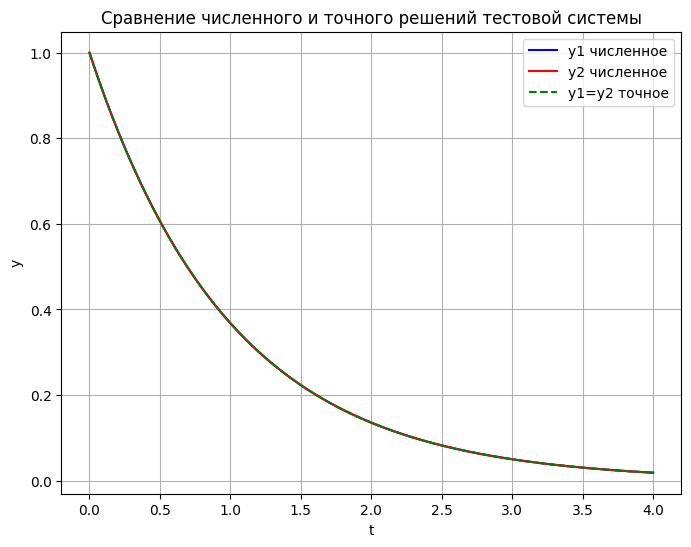

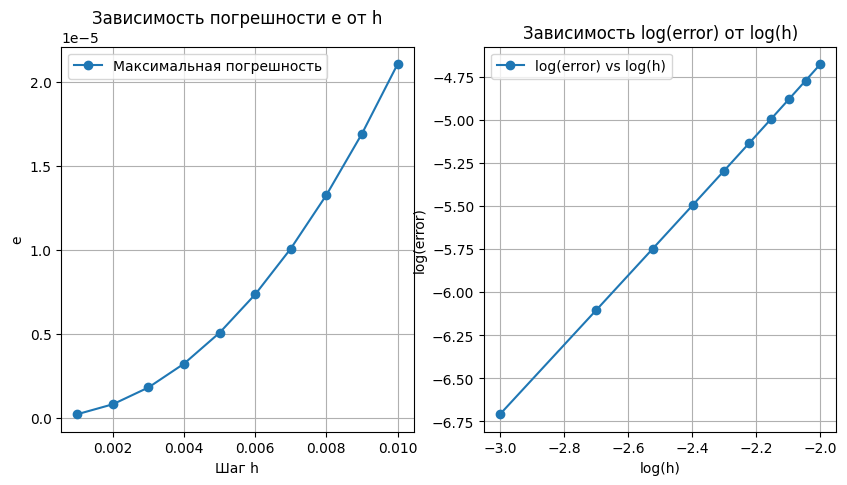

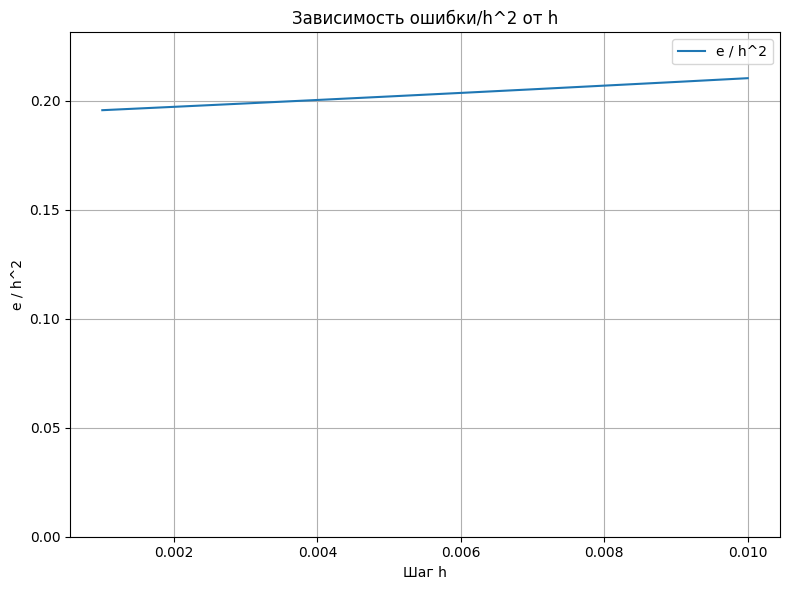

Таблица 1: h и максимальная погрешность
| h      | Max Error      |
|--------|----------------|
| 0.001 | 1.96e-07 |
| 0.002 | 7.89e-07 |
| 0.003 | 1.79e-06 |
| 0.004 | 3.21e-06 |
| 0.005 | 5.05e-06 |
| 0.006 | 7.33e-06 |
| 0.007 | 1.01e-05 |
| 0.008 | 1.33e-05 |
| 0.009 | 1.69e-05 |
| 0.010 | 2.10e-05 |

Таблица 2: h, alpha и C(h)
| h      | alpha   | C(h)    |
|--------|---------|---------|
| 0.001 | 2.011 | 0.196 |
| 0.002 | 2.019 | 0.197 |
| 0.003 | 2.028 | 0.199 |
| 0.004 | 2.036 | 0.200 |
| 0.005 | 2.044 | 0.202 |
| 0.006 | 2.052 | 0.204 |
| 0.007 | 2.061 | 0.205 |
| 0.008 | 2.069 | 0.207 |
| 0.009 | 2.078 | 0.209 |


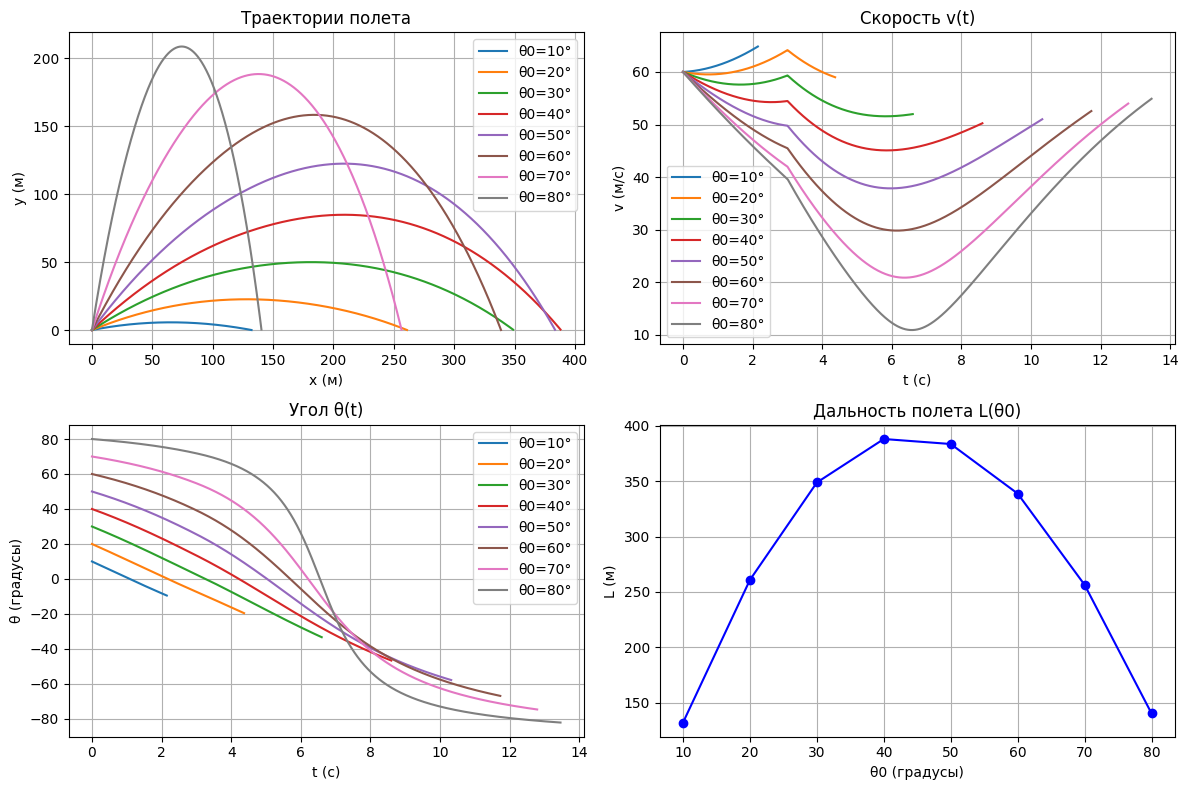

Максимальная дальность полета: 391.4815844212302
достигается при угле, равном  44.0  градусам
Угол: 10°, Дальность: 132.16 м
Угол: 20°, Дальность: 260.92 м
Угол: 30°, Дальность: 348.82 м
Угол: 40°, Дальность: 388.05 м
Угол: 50°, Дальность: 383.54 м
Угол: 60°, Дальность: 338.78 м
Угол: 70°, Дальность: 256.40 м
Угол: 80°, Дальность: 140.36 м


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
m0 = 50.0
m_fuel = 15.0
C = 0.25
rho = 1.29
S = 0.35
g = 9.81
v0 = 60.0
T = 8.0
t_burn = 3.0
theta_0_values = np.radians(np.linspace(10, 80, 8))

def runge_kutta_2(f, t0, y0, h, N):
    t = t0
    y = y0
    Y = [y0]
    T = [t0]
    for _ in range(N):
        k1 = f(t, y)
        k2 = f(t + 2*h/3, y + 2*h/3 * k1)
        y = y + h * (k1 + 3*k2)/4
        t += h
        Y.append(y)
        T.append(t)
    return np.array(T), np.array(Y)

def comp(t, y, alpha, beta):
    y1, y2 = y[0], y[1]
    y1_prime = -alpha * y1 - beta * y2 + (alpha + beta - 1) * np.exp(-t)
    y2_prime = -beta * y1 - alpha * y2 + (alpha + beta - 1) * np.exp(-t)
    return np.array([y1_prime, y2_prime])

def test_system(alpha, beta):
    return lambda t, y: comp(t, y, alpha, beta)
def test_exact(t):
    return np.array([np.exp(-t), np.exp(-t)])

def plot_numerical_vs_exact():
    alpha, beta = 5, 10
    h = 0.01
    a, b = 0, 4
    N = int(b / h)
    y0 = np.array([1.0, 1.0])

    t, Y = runge_kutta_2(test_system(alpha, beta), 0, y0, h, N)
    y1_num, y2_num = Y[:, 0], Y[:, 1]
    y_exact = np.exp(-t)

    plt.figure(figsize=(8, 6))
    plt.plot(t, y1_num, 'b-', label='y1 численное')
    plt.plot(t, y2_num, 'r-', label='y2 численное')
    plt.plot(t, y_exact, 'g--', label='y1=y2 точное')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Сравнение численного и точного решений тестовой системы')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_numerical_vs_exact()

def test_error_analysis():
    alpha, beta = 5, 10
    t_span = [0, 4]
    y0 = np.array([1.0, 1.0])
    h_values = np.linspace(0.001, 0.01, 10)
    errors = []
    errors_h2 = []

    for h in h_values:
        N = int((t_span[1] - t_span[0]) / h)
        t, y = runge_kutta_2(test_system(alpha, beta), t_span[0], y0, h, N)
        y1_exact, y2_exact = test_exact(t)
        error = np.max(np.sqrt((y[:, 0] - y1_exact)**2 + (y[:, 1] - y2_exact)**2))
        errors.append(error)
        errors_h2.append(error / h**2)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(h_values, errors, 'o-', label='Максимальная погрешность')
    plt.xlabel('Шаг h')
    plt.ylabel('e')
    plt.title('Зависимость погрешности e от h')
    plt.grid(True)
    plt.legend()

    log_h = np.log10(h_values)
    log_err = np.log10(errors)
    alpha_values = []
    for i in range(len(h_values) - 1):
        alpha = (log_err[i+1] - log_err[i]) / (log_h[i+1] - log_h[i])
        alpha_values.append(alpha)

    plt.subplot(1, 2, 2)
    plt.plot(log_h, log_err, 'o-', label='log(error) vs log(h)')
    plt.xlabel('log(h)')
    plt.ylabel('log(error)')
    plt.title('Зависимость log(error) от log(h)')
    plt.grid(True)
    plt.legend()

    plt.savefig('log_error_vs_log_h.png')
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(h_values, errors_h2, label='e / h^2')
    plt.xlabel('Шаг h')
    plt.ylabel('e / h^2')
    plt.title('Зависимость ошибки/h^2 от h')
    plt.grid(True)
    plt.legend()
    plt.ylim(0, max(errors_h2) * 1.1)
    plt.tight_layout()
    plt.savefig('c.png')
    plt.show()

    print("Таблица 1: h и максимальная погрешность")
    print("| h      | Max Error      |")
    print("|--------|----------------|")
    for h, error in zip(h_values, errors):
        print(f"| {h:.3f} | {error:.2e} |")

    print("\nТаблица 2: h, alpha и C(h)")
    print("| h      | alpha   | C(h)    |")
    print("|--------|---------|---------|")
    for i in range(len(h_values)-1):
        h = h_values[i]
        alpha = alpha_values[i]
        C_h = errors_h2[i]
        print(f"| {h:.3f} | {alpha:.3f} | {C_h:.3f} |")

test_error_analysis()

def mass(t):
    if t <= t_burn:
        return m0 - (m_fuel / t_burn) * t
    return m0 - m_fuel

# Производная массы
def mass_prime(t):
    if t <= t_burn:
        return -m_fuel / t_burn
    return 0.0

def thrust(t):
    if t <= t_burn:
        return T
    return 0.0

def rocket_system(t, y):
    x, y, v, theta = y
    v = max(v, 0.0)
    m = mass(t)
    m_prime = mass_prime(t)
    T_val = thrust(t)

    v_prime = (T_val - C * rho * S * v**2 / 2) / m - m_prime * v / m - g * np.sin(theta)
    theta_prime = -g * np.cos(theta) / v if v > 0 else 0.0

    x_prime = v * np.cos(theta)
    y_prime = v * np.sin(theta)

    return np.array([x_prime, y_prime, v_prime, theta_prime])

def solve_rocket(theta_0, h=0.01, t_max=100):
    y0 = np.array([0.0, 0.0, v0, theta_0])
    N = int(t_max / h)
    t, Y = runge_kutta_2(rocket_system, 0, y0, h, N)

    # Останавливаем расчет, когда ракета достигает земли
    mask = Y[:, 1] >= 0
    t = t[mask]
    Y = Y[mask]

    return t, Y

L_values = []
plt.figure(figsize=(12, 8))

for theta_0 in theta_0_values:
    t, Y = solve_rocket(theta_0)
    x, y, v, theta = Y[:, 0], Y[:, 1], Y[:, 2], Y[:, 3]

    L = x[-1]
    L_values.append(L)

    plt.subplot(2, 2, 1)
    plt.plot(x, y, label=f'θ0={np.degrees(theta_0):.0f}°')
    plt.xlabel('x (м)')
    plt.ylabel('y (м)')
    plt.title('Траектории полета')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(t, v, label=f'θ0={np.degrees(theta_0):.0f}°')
    plt.xlabel('t (с)')
    plt.ylabel('v (м/с)')
    plt.title('Скорость v(t)')
    plt.grid(True)
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(t, np.degrees(theta), label=f'θ0={np.degrees(theta_0):.0f}°')
    plt.xlabel('t (с)')
    plt.ylabel('θ (градусы)')
    plt.title('Угол θ(t)')
    plt.grid(True)
    plt.legend()

plt.subplot(2, 2, 4)
plt.plot(np.degrees(theta_0_values), L_values, 'bo-')
plt.xlabel('θ0 (градусы)')
plt.ylabel('L (м)')
plt.title('Дальность полета L(θ0)')
plt.grid(True)

plt.tight_layout()
plt.show()

teta_values = np.arange(math.pi * 10 / 180, math.pi * 80 / 180, math.pi / 180)
max_range = 0
optimal_teta = 0
N = len(teta_values)
L_values_opt = np.zeros(N)
for i in range(N):
    teta0 = teta_values[i]
    t, y = solve_rocket(teta0, h=0.01, t_max=20)
    L = y[-1, 0]
    L_values_opt[i] = L
    if L > max_range:
        max_range = L
        optimal_teta = teta0

print('Максимальная дальность полета:', max_range)
print('достигается при угле, равном ', np.round(optimal_teta * 180 / math.pi), ' градусам')


theta_step_values = np.arange(10, 81, 10)
for theta_deg in theta_step_values:
    theta_rad = np.radians(theta_deg)
    t, Y = solve_rocket(theta_rad, h=0.01, t_max=20)
    L = Y[-1, 0]
    print(f"Угол: {theta_deg}°, Дальность: {L:.2f} м")
